In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

# Plotting 12 images to check dataset
Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.

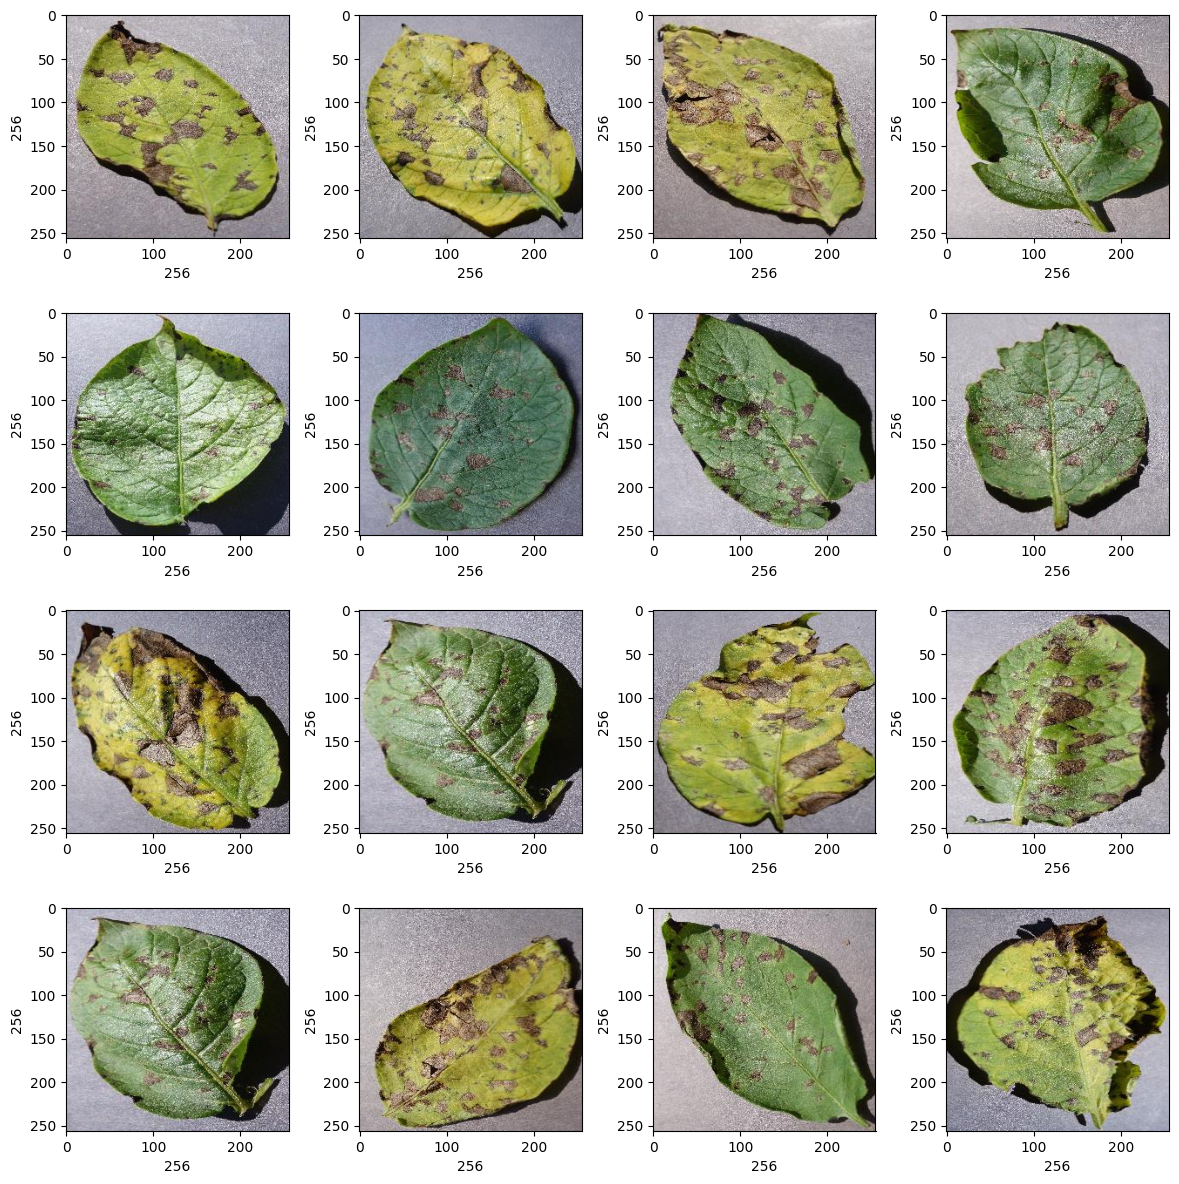

In [6]:

plt.figure(figsize=(12,12))
path = "dataset/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

# Converting Images to array 

In [7]:

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

# Reading and converting image to numpy array
Now we will convert all the images into numpy array.

In [8]:
dir = "dataset"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1



for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

# Visualize the number of classes count

In [9]:

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see

0    300
1    300
2    300
dtype: int64

# Next we will observe the shape of the image.

In [10]:

image_list[0].shape

(256, 256, 3)

# Checking the total number of the images which is the length of the labels list.

In [11]:

label_list = np.array(label_list)
label_list.shape

(900,)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.


In [13]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

# Next we will split the dataset into validation and training data.
Splitting the training data set into training and validation data sets

In [17]:

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

# Training the model

In [18]:

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50


5/5 [==============================] - 25s 3s/step - loss: 1.0233 - accuracy: 0.3785 - val_loss: 0.9065 - val_accuracy: 0.5417
Epoch 2/50
5/5 [==============================] - 12s 2s/step - loss: 0.8739 - accuracy: 0.5399 - val_loss: 0.7721 - val_accuracy: 0.6667
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 0.7403 - accuracy: 0.6267 - val_loss: 0.6453 - val_accuracy: 0.6944
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 0.6211 - accuracy: 0.6528 - val_loss: 0.5545 - val_accuracy: 0.9167
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 0.5217 - accuracy: 0.9323 - val_loss: 0.4622 - val_accuracy: 0.8611
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 0.4352 - accuracy: 0.9392 - val_loss: 0.3953 - val_accuracy: 0.9306
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 0.3646 - accuracy: 0.9514 - val_loss: 0.3438 - val_accuracy: 0.9444
Epoch 8/50
5/5 [=====================

# Plot the training history

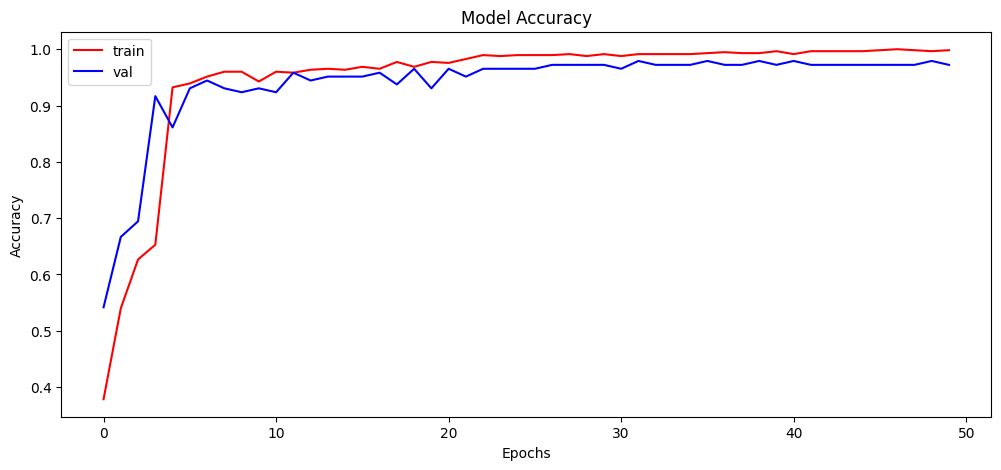

In [19]:

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [20]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 119ms/step - loss: 0.0339 - accuracy: 0.9944
Test Accuracy: 99.44444298744202


In [21]:
y_pred = model.predict(x_test) 

6/6 [==============================] - 1s 117ms/step


# Plotting image to compare

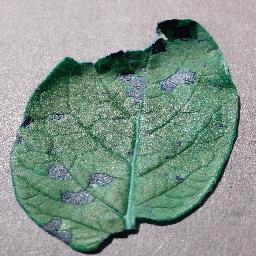

In [22]:

img = array_to_img(x_test[10])
img

# Finding max value from predition list and comaparing original value vs predicted

In [23]:

print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


# Save the model to a file (replace 'your_model.h5' with your desired file name)

In [24]:

model.save('Leaf-Diseade-Prediction.h5')


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
